In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as data

# Инициализация данных


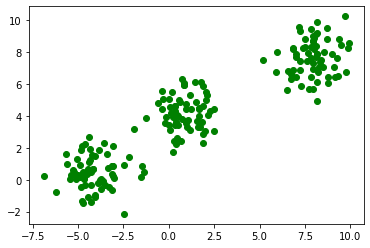

In [127]:

x,y = data.make_blobs(n_samples = 200, n_features=2, centers=3, random_state=3)
plt.scatter(x[:,0],x[:,1],c = 'green')
plt.show()

# Алгоритм кластеризации 


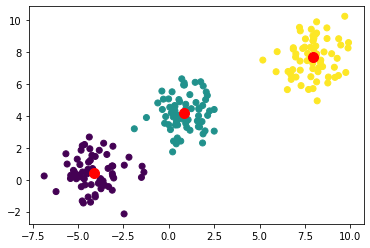

In [219]:


def clust(x,cl_n): 
    """
    x - набор точек
    cl_n - кол-во классов, на которые необходимо разбить объект
    
    """
    
    def distance(x,y):
        """
            x и y - двумерные точки, между которыми необходимо найти расстояние
        """
        return (((x[0]-y[0])**2 + (x[1]-y[1])**2)**(1/2))
    
    clust_centers = []
    a = np.zeros(len(x)) #выходная сетка кластеров
    a_count = np.zeros(cl_n) #кол-во точек в каждом классе
    
    
    #начальная инициализация первый n штук набора делаем n классами
    for i in range(cl_n): 
        clust_centers.append(x[i])
        a[i] = i 
        a_count[i]+=1
  
    #начинаем сверять расстояния и причислять точки к одному из классов
    for dots_i in range(cl_n,len(x)):
        min_dist = 1000000
        dist_class = 5
        for center_i in range(len(clust_centers)):
            
            if (distance(x[dots_i],clust_centers[center_i]) < min_dist):
                min_dist = distance(x[dots_i],clust_centers[center_i])
                dist_class = center_i
        a[dots_i] = dist_class
        clust_centers[dist_class] = (clust_centers[dist_class]*a_count[dist_class]+x[dots_i])/(a_count[dist_class]+1)
        a_count[dist_class]+=1
 
    
    #дополнительный шаги (повторно пробегаемся, чтобы границы стали ЖБ
    for _ in range (1):
        for dots_i in range(len(x)):
            min_dist = 1000000
            dist_class = 5
            for center_i in range(len(clust_centers)):
                if (distance(x[dots_i],clust_centers[center_i]) < min_dist):
                    min_dist = distance(x[dots_i],clust_centers[center_i])
                    dist_class = center_i
            if dist_class!=a[dots_i]:
                old_class = int(a[dots_i])
                clust_centers[old_class] = (clust_centers[old_class]*a_count[old_class]-x[dots_i])/(a_count[old_class]-1)
                a_count[old_class]-=1
                clust_centers[dist_class] = (clust_centers[dist_class]*a_count[dist_class]+x[dots_i])/(a_count[dist_class]+1)
                a_count[dist_class]+=1
                a[dots_i] = dist_class
            
            
    #центры масс кадлго класса
    for dot in clust_centers:
        plt.scatter(dot[0],dot[1],100,marker = 'o',c = 'red',zorder=10)
    return a
            

    
        
    



plt.scatter(x[:,0],x[:,1], c = clust(x,cl_n = 3))
plt.show()
                
        
        
           




    

## 